# scrapy
## get

In [1]:
# get
import requests
headers = {
    "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36"
}
kw = {
    "wd": "python"
}
url = "http://www.baidu.com/s"
response = requests.get(url, headers=headers, params=kw)
print(response)
print(response.request.url)

<Response [200]>
http://www.baidu.com/s?wd=python


<Response [200]>
http://www.baidu.com/s?wd=%E6%88%91%E6%98%AF%E8%B0%81


'<!DOCTYPE html>\n<!--STATUS OK-->\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\t\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\n\n\n<html>\n\t<head>\n\t\t\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t\t<meta http-equiv="content-type" content="text/html;charset=utf-8">\n\t\t<meta content="always" name="referrer">\n        <meta name="theme-color" content="#2932e1">\n        <link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" />\n        <link rel="icon" sizes="any" mask href="//www.baidu.com/img/baidu_85beaf5496f291521eb75ba38eacbd87.svg">\n        <link rel="search" type="application/opensearchdescription+xml" href="/content-search.xml" title="百度搜索" />\n\t\t\n\t\t\n<title>我是谁_百度搜索</title>\n\n\t\t\n\n\t\t\n<style data-for="result" type="text/css" id="css_newi_res
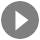
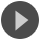

In [2]:
# alternative way of get
# example of Baidu Tieba
headers = {
    "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36"
}
url = "http://www.baidu.com/s?wd={}".format("我是谁")
response = requests.get(url, headers=headers)
print(response)
print(response.request.url)
response.content.decode()

## post
notice that when there are some item we cannot get from the web, we can change the decive 

In [3]:
# post 
# use Baidu translation
headers = {
    "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36"
}
url = "https://fanyi.baidu.com/v2transapi"
data = {
    'from': 'zh',
    'to': 'en',
    'query': '我是谁',
    'transtype': 'translang',
    'simple_means_flag': '3',
    'sign': '325815.7046',
    'token': '0a4a64c2cde7d6b14b99df14f634f3d8'
}
response = requests.post(url, headers=headers, data=data)
print(response)
print(response.request.url)
response.content.decode()

<Response [200]>
https://fanyi.baidu.com/v2transapi


'{"error":997,"from":"zh","to":"en","query":"\\u6211\\u662f\\u8c01"}'

In [4]:
# post 
# use Baidu translation Mobile
headers = {
    "user-agent": "Mozilla/5.0 (Linux; Android 8.0.0; Nexus 6P Build/OPP3.170518.006) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Mobile Safari/537.36"
}
url = "https://fanyi.baidu.com/basetrans"
data = {
    'from': 'zh',
    'to': 'en',
    'query': '我是谁'
}
response = requests.post(url, headers=headers, data=data)
print(response)
print(response.request.url)
response.content.decode()

<Response [200]>
https://fanyi.baidu.com/basetrans


'{"errno":997,"from":"zh","to":"en","query":"\\u6211\\u662f\\u8c01"}'

## proxy


In [11]:
# get
import requests
headers = {
    "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36"
}
kw = {
    "wd": "python"
}
proxies = {
    "https":"https://125.25.45.167:56628"
}
url = "http://www.baidu.com/s"
response = requests.get(url, headers=headers, params=kw, proxies=proxies)
print(response)
print(response.request.url)

<Response [200]>
http://www.baidu.com/s?wd=python


## session
use session can avoid specify the cookie
two ways to use cookie
1. add in the header dict
2. structure cookie dict, then add it in the post protocol


## save image


In [15]:
# save image
headers = {
    "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36"
}
url = "https://www.google.com/images/branding/googlelogo/2x/googlelogo_color_272x92dp.png"
response = requests.get(url, headers=headers)
print(response)
print(response.request.url)
with open("asset/google.png",'wb') as f:
    f.write(response.content)

<Response [200]>
https://www.google.com/images/branding/googlelogo/2x/googlelogo_color_272x92dp.png


## 寻找登录地址
1. 在form表单里寻找，action就是url
    - post的数据是input里的name作为键
2. 抓包，在network里
    - 如果发生了跳转，就需要勾选perserve log
   

## Json 技巧
保存为json dumps  
从json读取 loads

In [20]:
# 保存为json
import json
my_dic = {"a":1, "b":2, "c":"中国"}
with open("asset/my_dict", "w", encoding="utf-8") as f:
    f.write(json.dumps(my_dic,ensure_ascii=False, indent=2))

In [25]:
# load from json
import json
with open("asset/my_dict", "r") as f:
    data = f.read()
data = json.loads(data)
print(type(data),data)

<class 'dict'> {'a': 1, 'b': 2, 'c': '中国'}


### loads and load
- loads use string liked object `my_dict = json.loads(json_string)`
- load use file liked object,means `fp` `my_dict = json.load(f)`

 ## re
 1. . stand for all character except `\n`, use re.S could match it

In [31]:
# re.S
import re
re.findall(".*","\n$abc\n"), re.findall(".*","\n$abc\n",re.S)

(['', '$abc', '', ''], ['\n$abc\n', ''])

In [46]:
# match specified num
import re
re.findall("\d","this1is2")

['1', '2']

In [48]:
# get partial of matched sentence
re.findall("ab(.*)g","abcdfegh")

['cdfe']

### r in string
use r could let string add \ automatically. means avoid parase

In [34]:
import re
re.findall('a\nb', 'a\nb'), re.findall(r'a\nb', 'a\nb')

(['a\nb'], ['a\nb'])

In [38]:
r'a\nb' == 'a\\nb'

True

In [45]:
re.findall('a\\nb', 'a\\nb'), re.findall(r'a\\nb', 'a\\nb')

([], ['a\\nb'])